In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.image import imread



In [28]:
#Ucitavanje dataset-a
data_dir = '../../../data'
os.listdir(data_dir)[0]

'ISIC_0015719.jpg'

In [11]:
csv_path = '../../../ISIC_2020_Training_GroundTruth.csv'
df = pd.read_csv(csv_path)

In [15]:
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [19]:
print(df.isnull().sum())
missing_rows = df[df.isnull().any(axis=1)]

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64


In [20]:
#Lista sa nazivima slika koje treba obrisati 
images_to_remove = missing_rows['image_name'].tolist()
df = df.dropna()

In [21]:
#Brisanje nepotrebnih slika (slike kojima fale podaci u csv-fajlu)
for image_name in images_to_remove:
    image_path = os.path.join(data_dir, f'{image_name}.jpg')
    if os.path.exists(image_path):
        os.remove(image_path)

In [22]:
df.to_csv('../../../ocisceni_podaci.csv', index=False)

In [23]:
print(f"Obrisano {len(missing_rows)} redova i {len(images_to_remove)} slika.")


Obrisano 595 redova i 595 slika.


In [24]:
#broj slika u folderu data nakon ciscenja :
if os.path.exists(data_dir):
	print(len(os.listdir(data_dir)))
else:
	print(f"Directory {data_dir} does not exist.")

32531


In [31]:
#Shape slika
dim1 = []
dim2 = []

for image_filename in os.listdir(data_dir):
    img = imread(data_dir + '\\' + image_filename)   #Uzimamo jednu sliku iteriramo po fajlovima
    d1,d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

2666.504411177031 4023.899972334081


<Axes: >

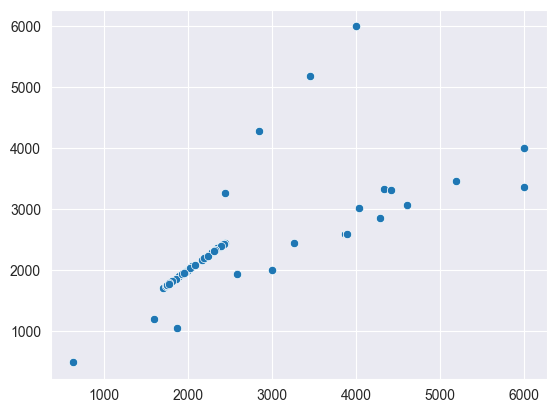

In [35]:
dim1
print(np.mean(dim1), np.mean(dim2))
sns.scatterplot(y=dim1, x=dim2)